In [2]:
from numpy import sqrt,pi,vectorize,exp
from scipy.special import gamma
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
cmap = sns.color_palette("husl", 8)
sns.set_palette(cmap)
from scipy.special import gammaln
%matplotlib inline

def plot_2d_pdf(pdf_func, X, Y, colors=None):
    Z = pdf_func(*np.meshgrid(X, Y))
    plt.contour(X, Y, Z, colors=colors)

    plt.xlabel("$\mu$")
    plt.ylabel("$\lambda$")

# pdf factory functions
def get_gamma_pdf(a, b):
    return lambda x: b**a / gamma(a) * x**(a-1) * exp(-x*b)

def get_gaussian_pdf(mu, sigma):
    norm = stats.norm(mu, sigma)
    return lambda x: norm.pdf(x)

def get_gaussian_gamma_pdf(mu, lamb, a, b):
    const = (b**a)*sqrt(lamb) / (gamma(a) * sqrt(2*pi))
    return lambda x, tau: const * tau**(a-0.5) * exp(-b*tau - 0.5*lamb*tau*(x-mu)**2)

def get_vi_gaussian_gamma_pdf(mu, lamb, a, b):
    gamma_pdf = get_gamma_pdf(a, b)
    gaussian_pdf = get_gaussian_pdf(mu, 1./lamb)
    return lambda x, tau: gaussian_pdf(x) * gamma_pdf(tau)

def normalGammaPdf(mu, lamb, muprior, kappa, alpha, beta):
    C = (beta ^ alpha * sqrt(kappa)) / (gamma(alpha) * sqrt(2*pi));
    p = C * (lamb**(alpha-1/2)) * (exp(-beta * lamb)) * (exp(-kappa/2* (lamb * (mu - muprior)**2)));
    return p

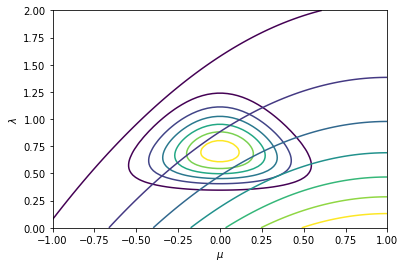

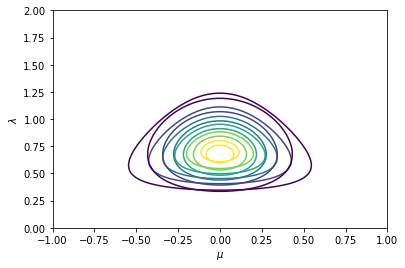

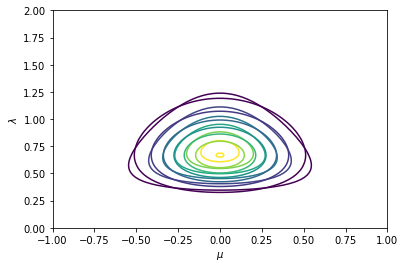

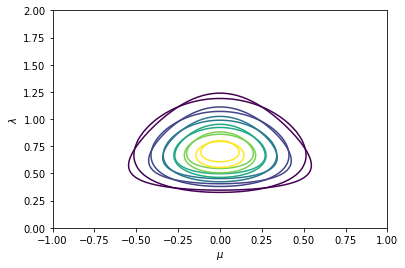

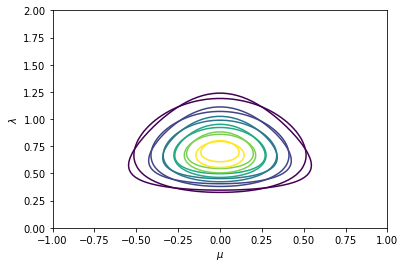

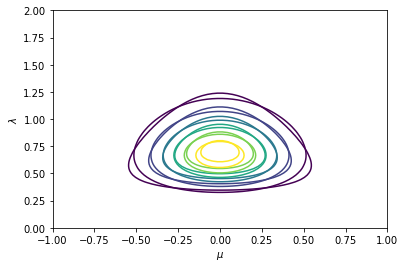

In [11]:
mu0 = 0.
var0 = 1

N = 20
X = np.random.normal(mu0, var0, N)
X = X - np.mean(X) # 0 mean
muX = np.mean(X)
varX = np.var(X)

# true posterior
a0 = 0
b0 = 0
k0 = 0
mu0 = 0

aNt = a0 + N/2.
bNt = b0 + 1./2*(N*varX + (k0*N*(muX - mu0)**2)/(k0 + N))
mut = (k0*mu0 + N*muX) / (k0 + N)
kNt = k0 + N
  
# initial guess
aN = 1
bN = 1
muN = 1
kN = 1

for i in range(6):
    x = np.linspace(-1.5, +1.5, 100)
    y = np.linspace(0, 2., 100)

    cmap = sns.cubehelix_palette(20, start=10)
    plot_2d_pdf(get_gaussian_gamma_pdf(mut, kNt, aNt, bNt), x, y)
    cmap = sns.cubehelix_palette(12, start=2)
    if i == 5:
        cmap = sns.light_palette("red", 10)
    plot_2d_pdf(get_vi_gaussian_gamma_pdf(muN, np.sqrt(kN), aN, bN), x, y)

    plt.axis([-1,1,0,2])
    plt.show()
        
    muN = (k0 * mu0 + N * muX) / (k0 + N)
    precision = aN/bN
    kN = (k0 + N) * precision
    
    e_mu = muN
    e_mu2 = 1./kN + muN**2
    aN = a0 + (N + 1)/2.
    bN = b0 + k0 * (e_mu2 + mu0**2 - 2*e_mu*mu0) + 1./2 * np.sum(X**2 + e_mu2 - 2*e_mu*X)

(100, 100)


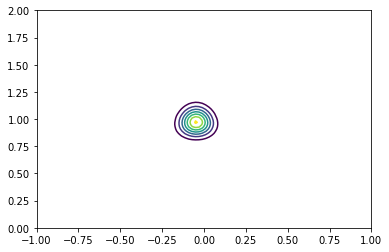

In [202]:
def get_gaussian_gamma_pdf(mu, lamb, a, b):
    const = (b**a)*sqrt(lamb) / (gamma(a) * sqrt(2*pi))
    return lambda x, tau: const * tau**(a-0.5) * exp(-b*tau - 0.5*lamb*tau*(x-mu)**2)

a0 = 0
b0 = 0
k0 = 0
mu0 = 0
mu0 = 0.
var0 = 1

N = 250
X = np.random.normal(mu0, var0, N)
#X = X - np.mean(X) # 0 mean
muX = np.mean(X)
varX = np.var(X)

aNt = a0 + N/2.
bNt = b0 + 1./2*(N*varX + (k0*N*(muX - mu0)**2)/(k0 + N))
mut = (k0*mu0 + N*muX) / (k0 + N)
kNt = k0 + N

x = np.linspace(-1, +1, 100)
y = np.linspace(0, 2., 100)
Z = get_gaussian_gamma_pdf(mut, kNt, aNt, bNt)(*np.meshgrid(x, y))
print(np.shape(Z))
plt.contour(x,y,Z)
